In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install missingno --quiet

In [ ]:
# read dataset using pandas and save it into dataframe in df variable

df = pd.read_csv('data/aggregate_median_jams_Kota Banjar.csv').sort_values(['street', 'time'])
df

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
996,2022-08-06 10:00:00.000,32.79,KOTA BANJAR,Desa Sukamukti,3,714.0,99.0,17.060000,2,35493837,2022-08-06,3.0,"LINESTRING (108.538599 -7.407272, 108.538695 -..."
1348,2022-08-27 05:00:00.000,32.79,KOTA BANJAR,Desa Sukamukti,1,2572.0,167.0,26.390000,11,36736357,2022-08-27,1.0,"MULTILINESTRING ((108.528598 -7.407995, 108.53..."
127,2022-07-09 16:00:00.000,32.79,KOTA BANJAR,Dewi Sartika,4,426.0,150.0,7.245000,8,33687885,2022-07-09,4.0,"MULTILINESTRING ((108.531034 -7.366359, 108.53..."
1158,2022-08-15 15:00:00.000,32.79,KOTA BANJAR,Dipatiukur,2,940.0,70.0,24.530000,9,36047867,2022-08-15,2.0,"MULTILINESTRING ((108.52019 -7.365166, 108.520..."
1346,2022-08-27 04:00:00.000,32.79,KOTA BANJAR,Dipatiukur,2,496.0,67.0,13.820000,1,36736355,2022-08-27,2.0,"LINESTRING (108.526336 -7.366463, 108.52612 -7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,2022-09-03 16:00:00.000,32.79,KOTA BANJAR,NaN,2,1175.0,152.0,17.870000,12,37173463,2022-09-03,2.0,"MULTILINESTRING ((108.598946 -7.395918, 108.59..."
1512,2022-09-03 21:00:00.000,32.79,KOTA BANJAR,NaN,2,880.0,60.0,25.619999,2,37173471,2022-09-03,2.0,"LINESTRING (108.609763 -7.380354, 108.610078 -..."
1514,2022-09-03 21:00:00.000,32.79,KOTA BANJAR,NaN,1,880.0,60.0,25.760000,2,37173470,2022-09-03,1.0,"LINESTRING (108.609763 -7.380354, 108.610078 -..."
1520,2022-09-04 10:00:00.000,32.79,KOTA BANJAR,NaN,3,930.0,167.0,14.310000,4,37245063,2022-09-04,3.0,"MULTILINESTRING ((108.504838 -7.388499, 108.50..."


#Data Understanding

In [ ]:
# count how many unique street exist in dataframe

len(df.street.unique())

32

In [ ]:
# count how many missing values exist in dataframe

df.isna().sum()

time                           0
kemendagri_kabupaten_kode      0
kemendagri_kabupaten_nama      0
street                       164
level                          0
median_length                  0
median_delay                   0
median_speed_kmh               0
total_records                  0
id                             0
date                           0
median_level                   0
geometry                       0
dtype: int64

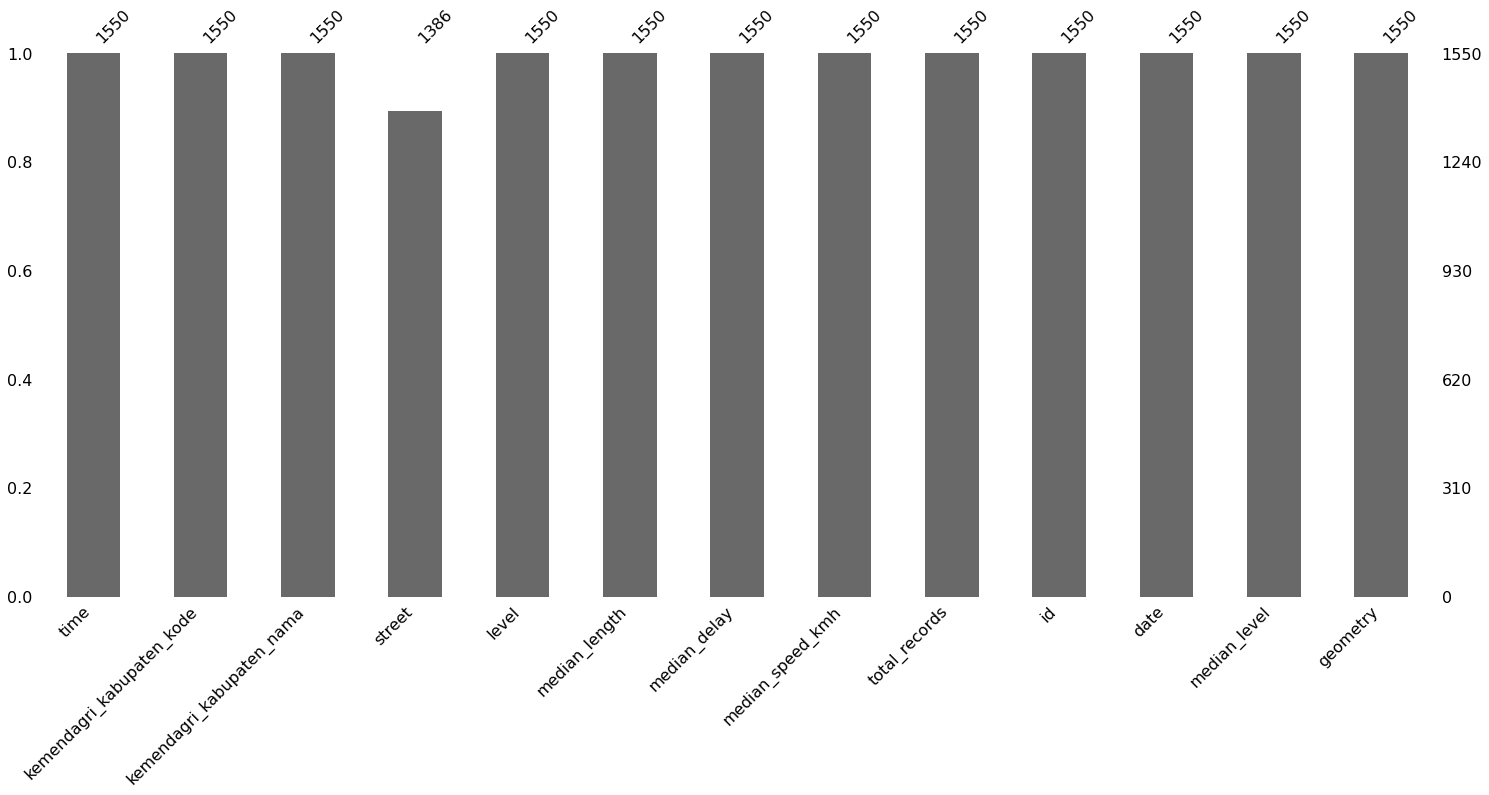

In [ ]:
# plot missing values in bar chart

import missingno as msno
%matplotlib inline

msno.bar(df)

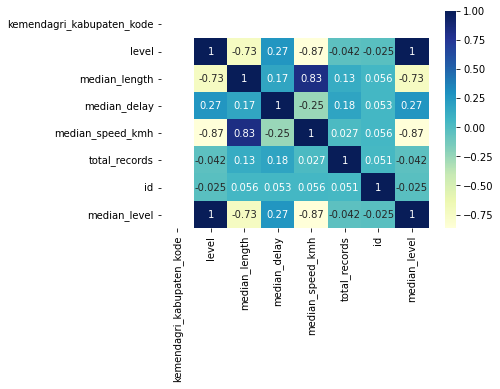

In [ ]:
# plot Spearman correlation heatmap

sns.heatmap(df.corr(method='spearman'), cmap="YlGnBu", annot=True)

In [ ]:
# print unique street

df.street.unique()

array(['Desa Sukamukti', 'Dewi Sartika', 'Dipatiukur',
       'Dr Husen Kartasasmita', 'Gerilya', 'Gotong Royong', 'Jalan BKR',
       'Jalan Banjar-Langensari', 'Jalan Pataruman-Langensari',
       'Jalan Raya Cimaragas', 'Jalan Wanareja-Langensari', 'KH Mustofa',
       'Kapten Jamhur', 'Masjid Agung', 'Mayjen Didi Kartasasmita',
       'N13 Brigjen M Isa', 'N13 Dr Sudarsono', 'N13 Jalan BKR',
       'N13 Jalan Raya Batulawang', 'N13 Jalan Raya Ciamis-Banjar',
       'N13 Letjen Soewarto', 'N13 Perintis Kemerdekaan',
       'N15 Jalan Raya Banjar-Majenang', 'N15 Siliwangi', 'Pataruman',
       'Pelita', 'Purwanegara', 'Rejasari', 'Sawo Jajar',
       'Tentara Pelajar', 'Waringinsari', nan], dtype=object)

#Data Pre-Processing & Cleansing

In [ ]:
# extract new features from datetime column

df['time'] = pd.to_datetime(df['time'])
df['dow'] = df.time.dt.dayofweek
df['hour'] = df.time.dt.hour
df.columns

Index(['time', 'kemendagri_kabupaten_kode', 'kemendagri_kabupaten_nama',
       'street', 'level', 'median_length', 'median_delay', 'median_speed_kmh',
       'total_records', 'id', 'date', 'median_level', 'geometry', 'dow',
       'hour'],
      dtype='object')

In [ ]:
df.sample(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,dow,hour
966,2022-08-05 17:00:00,32.79,KOTA BANJAR,N13 Brigjen M Isa,3,446.0,86.0,11.960,8,35412790,2022-08-05,3.0,"MULTILINESTRING ((108.531421 -7.357621, 108.53...",4,17
12,2022-07-06 10:00:00,32.79,KOTA BANJAR,N13 Jalan Raya Batulawang,2,1963.0,194.0,17.400,6,33490000,2022-07-06,2.0,"MULTILINESTRING ((108.543909 -7.407558, 108.54...",2,10
1134,2022-08-14 12:00:00,32.79,KOTA BANJAR,N13 Jalan Raya Ciamis-Banjar,1,1509.0,98.0,24.415,14,35989214,2022-08-14,1.0,"MULTILINESTRING ((108.4734 -7.349145, 108.4734...",6,12
1064,2022-08-09 23:00:00,32.79,KOTA BANJAR,N15 Siliwangi,2,964.0,106.0,19.490,5,35691202,2022-08-09,2.0,"MULTILINESTRING ((108.548644 -7.369368, 108.55...",1,23
782,2022-07-29 20:00:00,32.79,KOTA BANJAR,N13 Jalan BKR,4,226.0,1201.0,0.660,5,34966571,2022-07-29,4.0,"MULTILINESTRING ((108.541068 -7.374205, 108.53...",4,20


In [ ]:
# one-hot encode the categorical variable

dow_dummies = pd.get_dummies(df['dow'], prefix='dow')
hour_dummies = pd.get_dummies(df['hour'], prefix='hour')
df = pd.concat([df, dow_dummies, hour_dummies], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# split data into train and test set
X = df[~df.street.isna()].loc[:, ['dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'level', 'median_length', 'median_delay', 'median_speed_kmh']]
y = df[~df.street.isna()].loc[:, 'street']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# data oversampling using RandomOverSampler and SMOTE to balance the classes with a minimum data sample of 4.
oversample = RandomOverSampler(sampling_strategy='minority')
while (True):
  label, counts = np.unique(y_train, return_counts=True)
  print('min class sample', counts.min())
  if counts.min() >= 4:
    break
  X_train, y_train = oversample.fit_resample(X_train, y_train)  

smote = SMOTE(random_state=42, k_neighbors=3)
X_train, y_train = smote.fit_resample(X_train, y_train)

min class sample 1
min class sample 1
min class sample 1
min class sample 1
min class sample 1
min class sample 2
min class sample 2
min class sample 2
min class sample 2
min class sample 2
min class sample 2
min class sample 3
min class sample 3
min class sample 3
min class sample 3
min class sample 4


In [ ]:
unique_values, counts = np.unique(y_train, return_counts=True)

print('-------TRAIN--------')
for value, count in zip(unique_values, counts):
    print(f"Class {value} has {count} members")

print('-------TEST--------')
unique_values, counts = np.unique(y_test, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Class {value} has {count} members")

-------TRAIN--------
Class Desa Sukamukti has 310 members
Class Dewi Sartika has 310 members
Class Dipatiukur has 310 members
Class Dr Husen Kartasasmita has 310 members
Class Gerilya has 310 members
Class Gotong Royong has 310 members
Class Jalan BKR has 310 members
Class Jalan Banjar-Langensari has 310 members
Class Jalan Pataruman-Langensari has 310 members
Class Jalan Raya Cimaragas has 310 members
Class Jalan Wanareja-Langensari has 310 members
Class KH Mustofa has 310 members
Class Kapten Jamhur has 310 members
Class Masjid Agung has 310 members
Class Mayjen Didi Kartasasmita has 310 members
Class N13 Brigjen M Isa has 310 members
Class N13 Dr Sudarsono has 310 members
Class N13 Jalan BKR has 310 members
Class N13 Jalan Raya Batulawang has 310 members
Class N13 Jalan Raya Ciamis-Banjar has 310 members
Class N13 Letjen Soewarto has 310 members
Class N13 Perintis Kemerdekaan has 310 members
Class N15 Jalan Raya Banjar-Majenang has 310 members
Class N15 Siliwangi has 310 members
Cla

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# robust scaling to the training and testing data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbor classification for a range from 2 to 25 values
for k in range(2, 25):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)

  y_pred = knn.predict(X_test_scaled)
  f1 = f1_score(y_test, y_pred, average='weighted')
  print('neighbor:', k, 'f1:', f1)

neighbor: 2 f1: 0.26984875048776874
neighbor: 3 f1: 0.32217765653118413
neighbor: 4 f1: 0.2948184806157763
neighbor: 5 f1: 0.3063765519623501
neighbor: 6 f1: 0.2836098995953959
neighbor: 7 f1: 0.27742990559545677
neighbor: 8 f1: 0.27459742370329504
neighbor: 9 f1: 0.2696750983938174
neighbor: 10 f1: 0.2509749434397476
neighbor: 11 f1: 0.2416907539502232
neighbor: 12 f1: 0.23259143035948118
neighbor: 13 f1: 0.21084127876851566
neighbor: 14 f1: 0.20685350693736215
neighbor: 15 f1: 0.20099500200967302
neighbor: 16 f1: 0.18290832938126503
neighbor: 17 f1: 0.17269730515449405
neighbor: 18 f1: 0.1706089567460322
neighbor: 19 f1: 0.16699301677108425
neighbor: 20 f1: 0.14815995745286858
neighbor: 21 f1: 0.16312948951872294
neighbor: 22 f1: 0.15830859752950205
neighbor: 23 f1: 0.14730887875178894
neighbor: 24 f1: 0.15154519621311865


In [ ]:
import xgboost as xgb

# XGBoost Classifier for baseline model
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train)

y_pred = xgbc.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.5683557152832989

In [ ]:
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score

# tuning using bayesian optimization

space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'gamma': hp.uniform('gamma', 0, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'max_delta_step': hp.quniform('max_delta_step', 0, 10, 1),
    'n_estimators': hp.quniform('n_estimators', 50, 500, 50)
}


# objective loss to be minimized is negative f1 score
def objective(space):
    clf = xgb.XGBClassifier(
    n_jobs=-1,
    random_state=42,
    n_estimators=int(space['n_estimators']),
    subsample=space['subsample'],
    max_depth=int(space['max_depth']),
    min_child_weight=int(space['min_child_weight']),
    colsample_bytree=space['colsample_bytree'],
    learning_rate=space['learning_rate'],
    gamma=space['gamma'],
    reg_alpha=space['reg_alpha'],
    reg_lambda=space['reg_lambda'],
    max_delta_step=int(space['max_delta_step'])
    )

    evaluation = [( X_train, y_train), ( X_test, y_test)]
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10, verbose=False)
    
    pred = clf.predict(X_test)
    f1_test = f1_score(y_test, pred, average='weighted')
    print(f1_test)
    print(space)
    return -f1_test

trials = Trials()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials = trials
)

print('Best hyperparameters:', best)

0.5986037325379805
{'colsample_bytree': 0.8977358507324162, 'gamma': 0.9158025805907669, 'learning_rate': 0.012841372715672313, 'max_delta_step': 4.0, 'max_depth': 6.0, 'min_child_weight': 5.0, 'n_estimators': 450.0, 'reg_alpha': 0.9242860584266649, 'reg_lambda': 0.3365600723703951, 'subsample': 0.548061081451673}
0.6003693471788972
{'colsample_bytree': 0.6736862326747809, 'gamma': 0.7116042889439261, 'learning_rate': 0.10290031010818211, 'max_delta_step': 7.0, 'max_depth': 9.0, 'min_child_weight': 5.0, 'n_estimators': 50.0, 'reg_alpha': 0.12883129513621028, 'reg_lambda': 0.2487377418315646, 'subsample': 0.9977515490940896}
0.4815862103875873
{'colsample_bytree': 0.9973473464577081, 'gamma': 0.34185987997511647, 'learning_rate': 0.014950453246449604, 'max_delta_step': 1.0, 'max_depth': 9.0, 'min_child_weight': 9.0, 'n_estimators': 150.0, 'reg_alpha': 0.26768930965882054, 'reg_lambda': 0.5394126314430149, 'subsample': 0.574516383988711}
0.614141438934002
{'colsample_bytree': 0.870520006

In [ ]:
from sklearn.metrics import classification_report

# train the model using the best hyperparameters from bayesian optimization

X = df[df.street.isna()].loc[:, ['dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'level', 'median_length', 'median_delay', 'median_speed_kmh']]

used_param = {'colsample_bytree': 0.50504012881984, 'gamma': 0.6041583763579679, 'learning_rate': 0.1371632472297465, 'max_delta_step': 1.0, 'max_depth': 8.0, 'min_child_weight': 2.0, 'n_estimators': 400.0, 'reg_alpha': 0.015315853813713576, 'reg_lambda': 0.592727466232894, 'subsample': 0.9456687054958454}
for c in ['max_depth','n_estimators']:
    used_param[c] = int(used_param[c])

xgbc = xgb.XGBClassifier(**used_param)
xgbc.fit(X_train, y_train)

y_pred = xgbc.predict(X_train)
print(classification_report(y_train, y_pred))

                                precision    recall  f1-score   support

                Desa Sukamukti       1.00      1.00      1.00       310
                  Dewi Sartika       1.00      1.00      1.00       310
                    Dipatiukur       1.00      1.00      1.00       310
         Dr Husen Kartasasmita       1.00      1.00      1.00       310
                       Gerilya       1.00      1.00      1.00       310
                 Gotong Royong       1.00      1.00      1.00       310
                     Jalan BKR       1.00      1.00      1.00       310
       Jalan Banjar-Langensari       1.00      0.99      1.00       310
    Jalan Pataruman-Langensari       0.99      1.00      1.00       310
          Jalan Raya Cimaragas       1.00      1.00      1.00       310
     Jalan Wanareja-Langensari       1.00      1.00      1.00       310
                    KH Mustofa       1.00      1.00      1.00       310
                 Kapten Jamhur       1.00      1.00      1.00  

In [ ]:
y_pred = xgbc.predict(X_test)
print(classification_report(y_test, y_pred))

                                precision    recall  f1-score   support

         Dr Husen Kartasasmita       0.41      0.33      0.37        27
                       Gerilya       0.00      0.00      0.00         1
                     Jalan BKR       1.00      1.00      1.00         5
       Jalan Banjar-Langensari       0.00      0.00      0.00         3
    Jalan Pataruman-Langensari       0.00      0.00      0.00         2
          Jalan Raya Cimaragas       0.00      0.00      0.00         1
                    KH Mustofa       0.50      0.50      0.50         2
      Mayjen Didi Kartasasmita       0.58      0.70      0.64        10
             N13 Brigjen M Isa       0.58      0.64      0.61        22
              N13 Dr Sudarsono       0.00      0.00      0.00         1
                 N13 Jalan BKR       1.00      1.00      1.00         2
     N13 Jalan Raya Batulawang       0.64      0.68      0.66        66
  N13 Jalan Raya Ciamis-Banjar       0.83      0.82      0.82  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
missing_predicted = xgbc.predict(X)
df.loc[X.index, ['street']] = missing_predicted
df.sample(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
851,2022-07-31 11:00:00,32.79,KOTA BANJAR,N13 Jalan Raya Ciamis-Banjar,1,1535.0,61.5,29.300,10,35115949,...,0,0,0,0,0,0,0,0,0,0
782,2022-07-29 20:00:00,32.79,KOTA BANJAR,N13 Jalan BKR,4,226.0,1201.0,0.660,5,34966571,...,0,0,0,0,0,0,1,0,0,0
428,2022-07-16 14:00:00,32.79,KOTA BANJAR,N13 Jalan Raya Batulawang,1,1650.0,73.5,29.515,20,34134061,...,1,0,0,0,0,0,0,0,0,0
1409,2022-08-29 14:00:00,32.79,KOTA BANJAR,N13 Jalan Raya Batulawang,3,1633.0,348.5,13.715,10,36864768,...,1,0,0,0,0,0,0,0,0,0
939,2022-08-04 10:00:00,32.79,KOTA BANJAR,N13 Jalan Raya Ciamis-Banjar,1,1635.0,96.0,27.940,19,35349974,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(['dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'], axis=1)
df.sample(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,dow,hour
1195,2022-08-18 06:00:00,32.79,KOTA BANJAR,N13 Jalan Raya Batulawang,2,839.0,62.0,21.07,3,36203377,2022-08-18,2.0,"MULTILINESTRING ((108.539766 -7.385051, 108.53...",3,6
541,2022-07-19 19:00:00,32.79,KOTA BANJAR,N13 Jalan Raya Ciamis-Banjar,1,1367.0,68.0,27.61,8,34340621,2022-07-19,1.0,"MULTILINESTRING ((108.516745 -7.346524, 108.51...",1,19
1494,2022-09-03 11:00:00,32.79,KOTA BANJAR,N13 Jalan Raya Batulawang,2,698.0,69.0,18.68,9,37173451,2022-09-03,2.0,"MULTILINESTRING ((108.541605 -7.380433, 108.54...",5,11
208,2022-07-11 19:00:00,32.79,KOTA BANJAR,Dr Husen Kartasasmita,3,806.0,122.0,13.58,11,33788989,2022-07-11,3.0,"MULTILINESTRING ((108.535967 -7.369566, 108.53...",0,19
74,2022-07-08 04:00:00,32.79,KOTA BANJAR,N13 Jalan Raya Ciamis-Banjar,1,2923.0,123.0,29.40,7,33620140,2022-07-08,1.0,"MULTILINESTRING ((108.470602 -7.350802, 108.47...",4,4


In [ ]:
# Define a function to categorize the hour into "morning", "noon", "afternoon", and "evening"
def categorize_hour(hour):
    if hour >= 6 and hour < 12:
        return "morning"
    elif hour >= 12 and hour < 15:
        return "noon"
    elif hour >= 15 and hour < 19:
        return "afternoon"
    else:
        return "evening"

# Apply the function to the hour column
df['hour_category'] = df['hour'].apply(categorize_hour)
df.sample()

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,dow,hour,hour_category
594,2022-07-22 01:00:00,32.79,KOTA BANJAR,N15 Siliwangi,1,2989.0,100.0,36.36,5,34513683,2022-07-22,1.0,"MULTILINESTRING ((108.580238 -7.355771, 108.57...",4,1,evening


In [ ]:
grouped = df.groupby(['street', 'hour_category']).median()
morning = grouped.xs("morning", level="hour_category")
noon = grouped.xs("noon", level="hour_category")
afternoon = grouped.xs("afternoon", level="hour_category")
evening = grouped.xs("evening", level="hour_category")

In [ ]:
morning

,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,median_level,dow,hour
street,,,,,,,,,,
Desa Sukamukti,32.79,3.0,714.00,99.00,17.0600,2.0,35493837.0,3.0,5.0,10.0
Dr Husen Kartasasmita,32.79,2.0,880.50,82.50,17.8200,4.5,35349974.0,2.0,3.0,10.0
Jalan Pataruman-Langensari,32.79,1.0,1108.00,82.00,25.9300,11.0,35046732.0,1.0,1.0,9.0
KH Mustofa,32.79,3.0,742.00,88.50,18.9850,5.5,36262530.5,3.0,4.0,9.5
Kapten Jamhur,32.79,3.0,541.00,75.00,12.4900,2.0,35493838.0,3.0,5.0,10.0
Mayjen Didi Kartasasmita,32.79,3.0,576.00,74.50,13.6100,6.0,35270276.0,3.0,5.0,8.0
N13 Brigjen M Isa,32.79,3.0,597.50,88.00,16.0050,5.5,35046727.5,3.0,4.0,8.0
N13 Jalan Raya Batulawang,32.79,2.0,958.00,83.50,19.4550,5.0,34972600.5,2.0,4.5,9.0
N13 Jalan Raya Ciamis-Banjar,32.79,1.0,1462.00,86.00,26.1800,6.0,35046739.5,1.0,4.0,9.0


Explained variance ratios: [0.66147816 0.31622333]
Loadings:
[[-0.34699391  0.56357161  0.65377991  0.36681616]
 [ 0.43964483 -0.38276426  0.74511116 -0.32405757]]


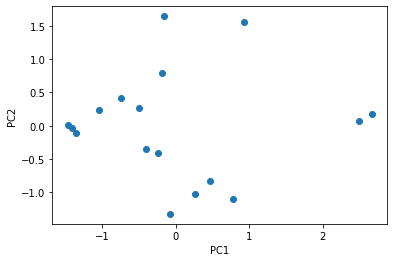

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

morning_scaler = RobustScaler()
morning_scaled = scaler.fit_transform(morning[['level', 'median_length', 'median_delay', 'median_speed_kmh']])

pca = PCA(n_components=2)
morning_scaled_pca = pca.fit_transform(morning_scaled)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Get the loadings of the original features on the components
loadings = pca.components_

# Print the explained variance ratios and the loadings
print("Explained variance ratios:", explained_variance_ratios)
print("Loadings:")
print(loadings)

# Visualize the transformed data
plt.scatter(morning_scaled_pca[:, 0], morning_scaled_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

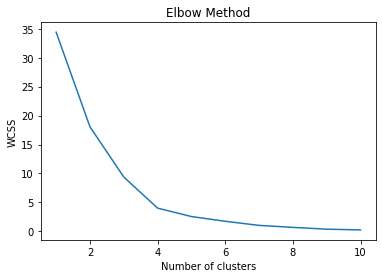

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(morning_scaled_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

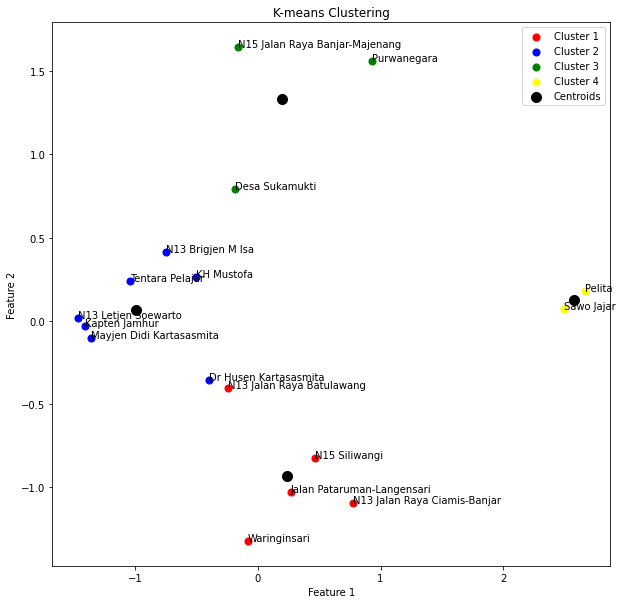

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(morning_scaled_pca)

# Visualize the clusters
plt.scatter(morning_scaled_pca[y_kmeans == 0, 0], morning_scaled_pca[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(morning_scaled_pca[y_kmeans == 1, 0], morning_scaled_pca[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(morning_scaled_pca[y_kmeans == 2, 0], morning_scaled_pca[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(morning_scaled_pca[y_kmeans == 3, 0], morning_scaled_pca[y_kmeans == 3, 1], s=50, c='yellow', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

for i, txt in enumerate(morning.index):
  plt.annotate(txt, (morning_scaled_pca[i, 0], morning_scaled_pca[i, 1]))

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
morning['cluster'] = y_kmeans
morning

<ipython-input-88-3ea1d65cb32d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning['cluster'] = y_kmeans


,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,median_level,dow,hour,cluster
street,,,,,,,,,,,
Desa Sukamukti,32.79,3.0,714.00,99.00,17.0600,2.0,35493837.0,3.0,5.0,10.0,3
Dr Husen Kartasasmita,32.79,2.0,880.50,82.50,17.8200,4.5,35349974.0,2.0,3.0,10.0,2
Jalan Pataruman-Langensari,32.79,1.0,1108.00,82.00,25.9300,11.0,35046732.0,1.0,1.0,9.0,2
KH Mustofa,32.79,3.0,742.00,88.50,18.9850,5.5,36262530.5,3.0,4.0,9.5,1
Kapten Jamhur,32.79,3.0,541.00,75.00,12.4900,2.0,35493838.0,3.0,5.0,10.0,1
Mayjen Didi Kartasasmita,32.79,3.0,576.00,74.50,13.6100,6.0,35270276.0,3.0,5.0,8.0,1
N13 Brigjen M Isa,32.79,3.0,597.50,88.00,16.0050,5.5,35046727.5,3.0,4.0,8.0,1
N13 Jalan Raya Batulawang,32.79,2.0,958.00,83.50,19.4550,5.0,34972600.5,2.0,4.5,9.0,2
N13 Jalan Raya Ciamis-Banjar,32.79,1.0,1462.00,86.00,26.1800,6.0,35046739.5,1.0,4.0,9.0,2


In [ ]:
morning.columns

Index(['kemendagri_kabupaten_kode', 'level', 'median_length', 'median_delay',
       'median_speed_kmh', 'total_records', 'id', 'median_level', 'dow',
       'hour', 'cluster'],
      dtype='object')

Explained variance ratios: [0.64239204 0.34948216]
Loadings:
[[-0.11747813  0.09880435 -0.97178282  0.17909422]
 [-0.56184099  0.63054049  0.22185047  0.48737641]]


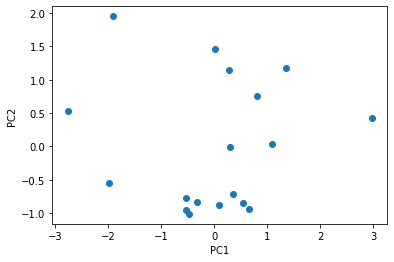

In [ ]:
noon_scaler = RobustScaler()
noon_scaled = scaler.fit_transform(noon[['level', 'median_length', 'median_delay', 'median_speed_kmh']])
pca = PCA(n_components=2)
noon_scaled_pca = pca.fit_transform(noon_scaled)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Get the loadings of the original features on the components
loadings = pca.components_

# Print the explained variance ratios and the loadings
print("Explained variance ratios:", explained_variance_ratios)
print("Loadings:")
print(loadings)

# Visualize the transformed data
plt.scatter(noon_scaled_pca[:, 0], noon_scaled_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

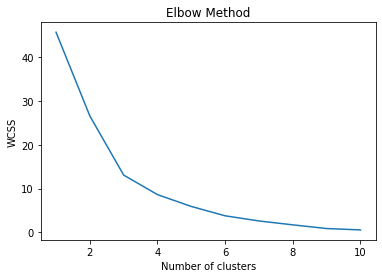

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(noon_scaled_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

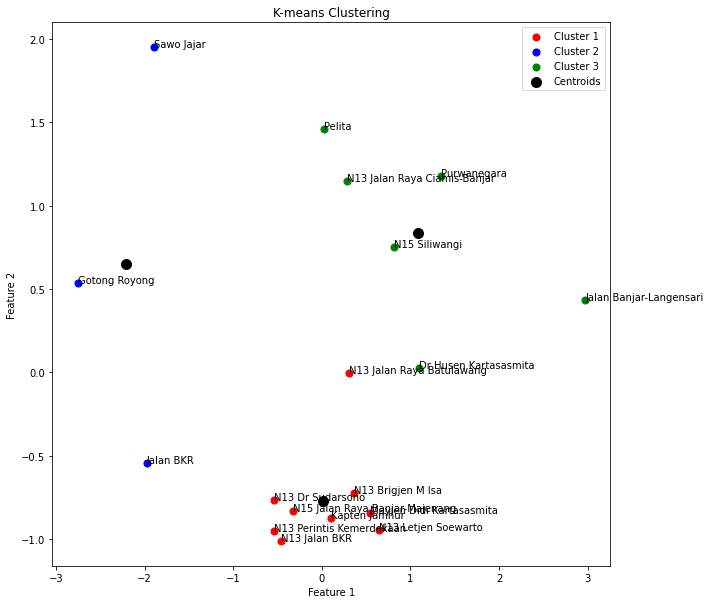

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(noon_scaled_pca)

# Visualize the clusters
plt.scatter(noon_scaled_pca[y_kmeans == 0, 0], noon_scaled_pca[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(noon_scaled_pca[y_kmeans == 1, 0], noon_scaled_pca[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(noon_scaled_pca[y_kmeans == 2, 0], noon_scaled_pca[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

for i, txt in enumerate(noon.index):
  plt.annotate(txt, (noon_scaled_pca[i, 0], noon_scaled_pca[i, 1]))

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
noon['cluster'] = y_kmeans
noon

<ipython-input-98-b19e6c7aa9c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noon['cluster'] = y_kmeans


,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,median_level,dow,hour,cluster
street,,,,,,,,,,,
Dr Husen Kartasasmita,32.79,2.0,1060.5,86.00,21.805000,8.0,35642486.5,2.0,4.0,13.0,2
Gotong Royong,32.79,2.5,1002.5,131.25,16.877500,10.5,35232109.0,2.5,4.5,13.0,1
Jalan BKR,32.79,3.0,346.0,119.50,7.137500,7.0,35115958.5,3.0,6.0,14.0,1
Jalan Banjar-Langensari,32.79,1.5,1404.0,66.00,36.535000,5.5,35115961.5,1.5,6.0,14.0,2
Kapten Jamhur,32.79,3.0,422.0,95.00,10.560000,2.0,35851195.0,3.0,4.0,12.0,0
Mayjen Didi Kartasasmita,32.79,3.0,543.0,90.00,12.420000,2.0,34665736.0,3.0,5.0,13.0,0
N13 Brigjen M Isa,32.79,3.0,585.0,92.50,14.240000,7.5,35046752.5,3.0,4.5,13.0,0
N13 Dr Sudarsono,32.79,3.0,420.0,102.50,9.090000,10.0,36047865.0,3.0,0.0,14.0,0
N13 Jalan BKR,32.79,3.0,226.0,101.00,5.550000,8.0,36203384.0,3.0,4.0,13.0,0


Explained variance ratios: [0.92082649 0.07296749]
Loadings:
[[ 0.08969285 -0.06140261  0.9896278  -0.0939241 ]
 [-0.50902754  0.69250096  0.13587449  0.49281995]]


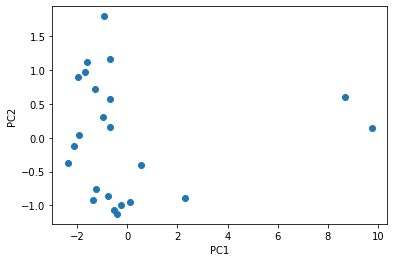

In [ ]:
afternoon_scaler = RobustScaler()
afternoon_scaled = scaler.fit_transform(afternoon[['level', 'median_length', 'median_delay', 'median_speed_kmh']])

pca = PCA(n_components=2)
afternoon_scaled_pca = pca.fit_transform(afternoon_scaled)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Get the loadings of the original features on the components
loadings = pca.components_

# Print the explained variance ratios and the loadings
print("Explained variance ratios:", explained_variance_ratios)
print("Loadings:")
print(loadings)

# Visualize the transformed data
plt.scatter(afternoon_scaled_pca[:, 0], afternoon_scaled_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

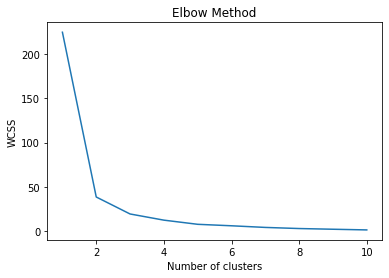

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(afternoon_scaled_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

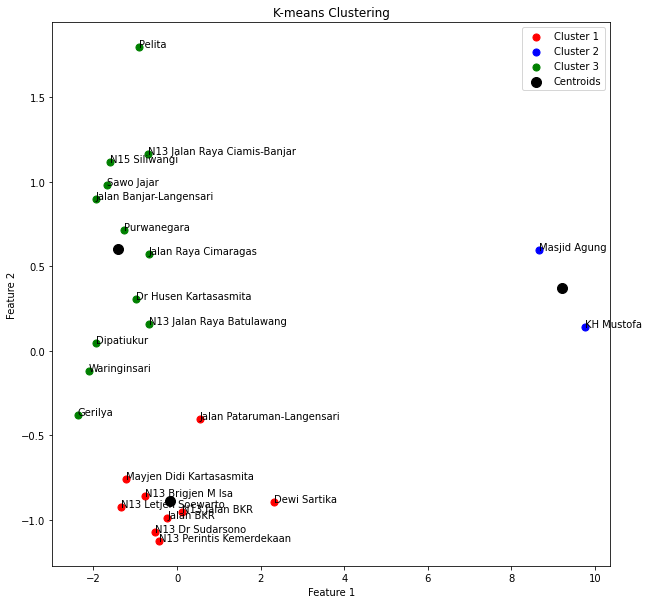

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(afternoon_scaled_pca)

# Visualize the clusters
plt.scatter(afternoon_scaled_pca[y_kmeans == 0, 0], afternoon_scaled_pca[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(afternoon_scaled_pca[y_kmeans == 1, 0], afternoon_scaled_pca[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(afternoon_scaled_pca[y_kmeans == 2, 0], afternoon_scaled_pca[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

for i, txt in enumerate(afternoon.index):
  plt.annotate(txt, (afternoon_scaled_pca[i, 0], afternoon_scaled_pca[i, 1]))

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
afternoon['cluster'] = y_kmeans
afternoon

<ipython-input-124-055122ecbdf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afternoon['cluster'] = y_kmeans


,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,median_level,dow,hour,cluster
street,,,,,,,,,,,
Dewi Sartika,32.79,4.0,426.0,150.00,7.245000,8.0,33687885.0,4.0,5.0,16.0,0
Dipatiukur,32.79,2.0,940.0,70.00,24.530000,9.0,36047867.0,2.0,0.0,15.0,2
Dr Husen Kartasasmita,32.79,2.0,1293.0,89.00,19.260000,6.0,34454390.0,2.0,3.0,17.0,2
Gerilya,32.79,2.0,772.0,60.00,16.810000,2.0,37245081.0,2.0,6.0,16.0,2
Jalan BKR,32.79,3.0,346.0,100.00,8.050000,9.0,35115970.0,3.0,6.0,15.0,0
Jalan Banjar-Langensari,32.79,1.0,1404.0,72.00,30.580000,6.0,35493856.0,1.0,5.0,17.0,2
Jalan Pataruman-Langensari,32.79,3.0,626.0,117.00,16.450000,8.0,36438021.0,3.0,2.0,17.0,0
Jalan Raya Cimaragas,32.79,1.0,1183.0,95.75,19.970000,8.5,35287044.0,1.0,2.0,16.5,2
KH Mustofa,32.79,4.0,506.0,298.50,5.440000,3.0,35174162.0,4.0,0.0,15.0,1


Explained variance ratios: [0.96096164 0.03660028]
Loadings:
[[ 0.0504975  -0.04440159  0.99508143 -0.07274231]
 [ 0.44317138 -0.65509225 -0.09590075 -0.60436439]]


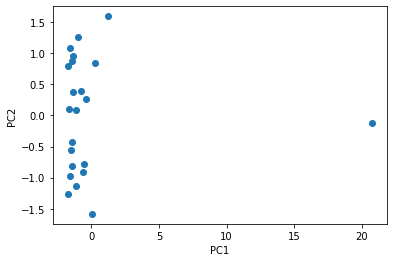

In [ ]:
evening_scaler = RobustScaler()
evening_scaled = scaler.fit_transform(evening[['level', 'median_length', 'median_delay', 'median_speed_kmh']])

pca = PCA(n_components=2)
evening_scaled_pca = pca.fit_transform(evening_scaled)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Get the loadings of the original features on the components
loadings = pca.components_

# Print the explained variance ratios and the loadings
print("Explained variance ratios:", explained_variance_ratios)
print("Loadings:")
print(loadings)

# Visualize the transformed data
plt.scatter(evening_scaled_pca[:, 0], evening_scaled_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

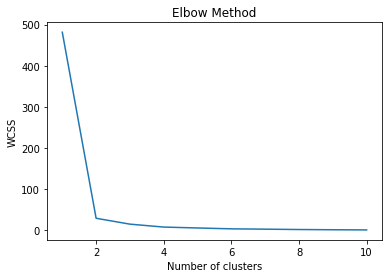

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(evening_scaled_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<ipython-input-136-18165a3c7a24>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening['cluster'] = y_kmeans


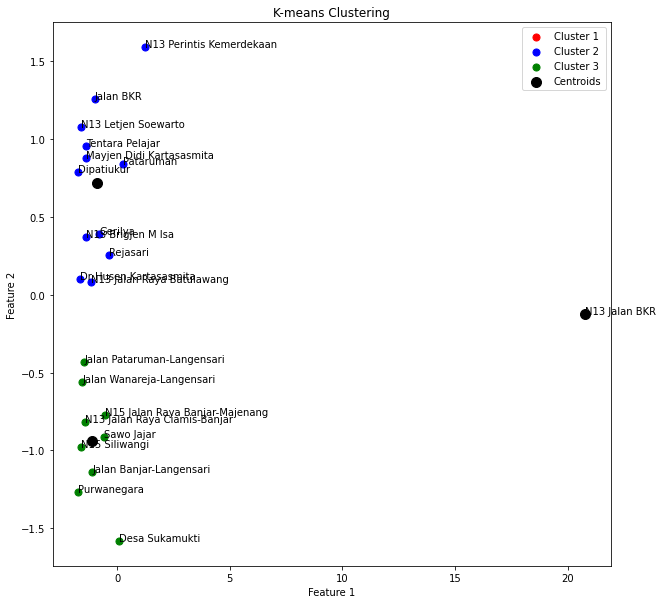

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(evening_scaled_pca)
evening['cluster'] = y_kmeans

# Visualize the clusters
plt.scatter(evening_scaled_pca[y_kmeans == 0, 0], evening_scaled_pca[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(evening_scaled_pca[y_kmeans == 1, 0], evening_scaled_pca[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(evening_scaled_pca[y_kmeans == 2, 0], evening_scaled_pca[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

for i, txt in enumerate(evening.index):
  plt.annotate(txt, (evening_scaled_pca[i, 0], evening_scaled_pca[i, 1]))

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
evening['cluster'] = y_kmeans
evening

<ipython-input-110-080ce0f94f67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening['cluster'] = y_kmeans


,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,median_level,dow,hour,cluster
street,,,,,,,,,,,
Desa Sukamukti,32.79,1.0,2572.00,167.00,26.390000,11.0,36736357.0,1.0,5.0,5.0,2
Dipatiukur,32.79,2.0,496.00,66.00,13.910000,6.0,36736356.5,2.0,5.0,4.5,1
Dr Husen Kartasasmita,32.79,2.0,1051.50,74.50,20.522500,9.0,35081380.0,2.0,2.0,20.0,1
Gerilya,32.79,2.0,887.00,115.50,14.890000,10.0,37173472.0,2.0,5.0,22.0,1
Jalan BKR,32.79,3.0,346.00,101.00,9.350000,9.0,34340620.0,3.0,1.0,19.0,1
Jalan Banjar-Langensari,32.79,1.0,1954.00,106.50,28.119999,11.0,36153904.0,1.0,4.0,19.0,2
Jalan Pataruman-Langensari,32.79,2.0,1520.50,86.00,24.744999,7.0,35989208.0,2.0,1.0,19.0,2
Jalan Wanareja-Langensari,32.79,1.0,1434.00,82.50,24.175000,8.0,34041403.0,1.0,4.0,5.0,2
Mayjen Didi Kartasasmita,32.79,3.0,649.00,82.50,13.990000,4.0,34592441.0,3.0,5.0,20.0,1
